# Reinforcement learning for Diabetes


This notebook proposes a reinforcement-learning based algorithm for optimal control of blood glucose in patients with type-1 diabetes. Specifically, the algorithm aims to suggest an optimal insulin injection policy. Its performance was assessed using simulations on a combination of the minimum model and part of the Hovorka model.


## 1. Train DDPG to learn optimal insulin policy

**Deep Deterministic Policy Gradients(DDPG)[1]**

Reference:
- [1] Lillicrap, T. P., Hunt, J. J., Pritzel, A., Heess, N., Erez, T., Tassa, Y., et al. (2015, September 9). CONTINUOUS CONTROL WITH DEEP REINFORCEMENT LEARNING
. arXiv.org.

#### Prepare envs

In [2]:
### import libraries
import gym

from garage.envs.normalized_env import normalize
from garage.exploration_strategies.ou_strategy import OUStrategy
from garage.replay_buffer import SimpleReplayBuffer
from gym.envs.registration import register
from datetime import datetime

In [3]:
import gym_envs.simglucose_env
env = gym.make('simglucose-adolescent2-v0')

adolescent#001
Dexcom
Insulet
[(7, 45), (12, 70), (16, 15), (18, 80), (23, 10)]


In [4]:
#normalize the environment 
env = normalize(env)

In [5]:
from garage.theano.algos import DDPG
from garage.theano.policies import DeterministicMLPPolicy
from garage.theano.q_functions import ContinuousMLPQFunction
from garage.theano.envs import TheanoEnv

/home/ubuntu/anaconda/envs/simglucose/lib/python3.6/site-packages/theano/gpuarray/dnn.py:184: UserWarning: Your cuDNN version is more recent than Theano. If you encounter problems, try updating Theano or downgrading cuDNN to a version >= v5 and <= v7.
  warnings.warn("Your cuDNN version is more recent than "
Using cuDNN version 7401 on context None
Preallocating 10869/11441 Mb (0.950000) on cuda6
Mapped name None to device cuda6: Tesla K80 (0000:00:1D.0)


#### start training

In [7]:
NUM_EPOCH = 10

In [8]:
#Returns a Theano wrapper class for gym.Env.
theano_env = TheanoEnv(env)
#define policy network(A policy function, controls how our agent acts.)
policy = DeterministicMLPPolicy(
    env_spec=theano_env.spec,
    # The neural network policy should have two hidden layers, each with 32 hidden units.
    hidden_sizes=(32, 32)
)

# define exploration strategy
es = OUStrategy(env_spec=theano_env.spec)


#define critic network(A value function, measures how good these actions are.)
qf = ContinuousMLPQFunction(env_spec=theano_env.spec)

#replay buffer breaks temporal correlations and thus benefits RL algorithms.
replay_buffer = SimpleReplayBuffer(
        env_spec=theano_env.spec, size_in_transitions=int(1e6), time_horizon=100)

# uses DDPG algo from garage
algo = DDPG(
    env=theano_env,
    policy=policy,
    qf=qf,
    es=es,
    pool=replay_buffer,
    batch_size=32,
    max_path_length=100,
    epoch_length=1000,
    min_pool_size=10000,
    n_epochs=NUM_EPOCH,
    discount=0.99,
    scale_reward=0.01,
    qf_learning_rate=1e-3,#critic learning rate
    policy_learning_rate=1e-4,#actor learning rate
    #plot=True,
    #pause_for_plot=True
    #evaluate=True
)

# Set up logger since we are not using run_experiment
# tabular_log_file = osp.join(log_dir, "progress.csv")
# garage_logger.add_tabular_output(tabular_log_file)
# garage_logger.set_tensorboard_dir(log_dir)
    
# trains the model
algo.train()

2018-12-07 03:39:14 | Populating workers...
2018-12-07 03:39:14 | Populated
2018-12-07 03:39:20 | epoch #0 | Training started


0% [##############################] 100% | ETA: 00:00:00

2018-12-07 03:40:00 | epoch #0 | Training finished
2018-12-07 03:40:00 | epoch #1 | Training started



Total time elapsed: 00:00:39
0% [##############################] 100% | ETA: 00:00:00

2018-12-07 03:40:40 | epoch #1 | Training finished
2018-12-07 03:40:40 | epoch #2 | Training started



Total time elapsed: 00:00:39
0% [##############################] 100% | ETA: 00:00:00

2018-12-07 03:41:20 | epoch #2 | Training finished
2018-12-07 03:41:20 | epoch #3 | Training started



Total time elapsed: 00:00:39
0% [##############################] 100% | ETA: 00:00:00

2018-12-07 03:42:00 | epoch #3 | Training finished
2018-12-07 03:42:00 | epoch #4 | Training started



Total time elapsed: 00:00:40
0% [##############################] 100% | ETA: 00:00:00

2018-12-07 03:42:40 | epoch #4 | Training finished
2018-12-07 03:42:40 | epoch #5 | Training started



Total time elapsed: 00:00:39
0% [##############################] 100% | ETA: 00:00:00

2018-12-07 03:43:20 | epoch #5 | Training finished
2018-12-07 03:43:20 | epoch #6 | Training started



Total time elapsed: 00:00:39
0% [##############################] 100% | ETA: 00:00:00

2018-12-07 03:44:00 | epoch #6 | Training finished
2018-12-07 03:44:00 | epoch #7 | Training started



Total time elapsed: 00:00:40
0% [##############################] 100% | ETA: 00:00:00

2018-12-07 03:44:40 | epoch #7 | Training finished
2018-12-07 03:44:40 | epoch #8 | Training started



Total time elapsed: 00:00:39
0% [##############################] 100% | ETA: 00:00:00

2018-12-07 03:45:20 | epoch #8 | Training finished
2018-12-07 03:45:20 | epoch #9 | Training started



Total time elapsed: 00:00:40
0% [##############################] 100% | ETA: 00:00:00

2018-12-07 03:46:00 | epoch #9 | Training finished
2018-12-07 03:46:00 | epoch #9 | Collecting samples for evaluation



Total time elapsed: 00:00:40
0% [##############################] 100% | ETA: 00:00:00

2018-12-07 03:52:38 | -----------------------  -----------
2018-12-07 03:52:38 | AverageAbsQ               0.745572
2018-12-07 03:52:38 | AverageAbsQYDiff          0.0474048
2018-12-07 03:52:38 | AverageAbsY               0.698792
2018-12-07 03:52:38 | AverageAction             0.0790396
2018-12-07 03:52:38 | AverageDiscountedReturn  14.8796
2018-12-07 03:52:38 | AverageEsReturn          17.9303
2018-12-07 03:52:38 | AveragePolicySurr        -0.483655
2018-12-07 03:52:38 | AverageQ                 -0.745572
2018-12-07 03:52:38 | AverageQLoss              0.00803916
2018-12-07 03:52:38 | AverageReturn            16
2018-12-07 03:52:38 | AverageY                 -0.698167
2018-12-07 03:52:38 | Epoch                     9
2018-12-07 03:52:38 | MaxEsReturn              19
2018-12-07 03:52:38 | MaxReturn                16
2018-12-07 03:52:38 | MinEsReturn              15
2018-12-07 03:52:38 | MinReturn                16
2018-12-07 03:52:38 | PolicyRegParamNorm        7.81209
2018-12-07 03:5


Total time elapsed: 00:06:38


##### save DDPG Policy

In [10]:
!mkdir -p ../output

In [11]:
import pickle
import datetime
ts = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M")
pickle.dump(algo.policy,open(f"../output/ddpg_policy_{ts}","wb"))

## 2. Implement the Insulin controller

In [12]:
!ls ../output

ddpg_policy_2018-12-07-03-53


In [13]:
SAVED_DDPG_POLICY = "../output/ddpg_policy_2018-12-07-03-53"

In [31]:
from simglucose.simulation.user_interface import simulate
from simglucose.controller.base import Controller, Action


class DDPGController(Controller):
    def __init__(self, init_state):
        self.init_state = init_state
        self.state = init_state
        self.model = pickle.load(open(SAVED_DDPG_POLICY,"rb"))

    def policy(self, observation, reward, done, **info):
        '''
        Every controller must have this implementation!
        ----
        Inputs:
        observation - a namedtuple defined in simglucose.simulation.env. For
                      now, it only has one entry: blood glucose level measured
                      by CGM sensor.
        reward      - current reward returned by environment
        done        - True, game over. False, game continues
        info        - additional information as key word arguments,
                      simglucose.simulation.env.T1DSimEnv returns patient_name
                      and sample_time
        ----
        Output:
        action - a namedtuple defined at the beginning of this file. The
                 controller action contains two entries: basal, bolus
        '''
        self.state = observation
        
        # Action in the gym environment is a scalar
        # representing the basal insulin, which differs from
        # the regular controller action outside the gym
        # environment (a tuple (basal, bolus)).
        # In the perfect situation, the agent should be able
        # to control the glucose only through basal instead
        # of asking patient to take bolus
        # so i'm setting bolus to None and only return basal here
    
        basal = self.model.get_action(observation)[0][0]
        bolus = None
        action = basal
        
        return action

    def reset(self):
        '''
        Reset the controller state to inital state, must be implemented
        '''
        self.state = self.init_state

## 3. Simulation

In [15]:
T_STEP = 100

In [16]:
test_env = gym.make('simglucose-adolescent2-v0')

adolescent#001
Dexcom
Insulet
[(7, 45), (12, 70), (16, 15), (18, 80), (23, 10)]


##### basal_bolus controller (Baseline)

Episode finished after 19 timesteps


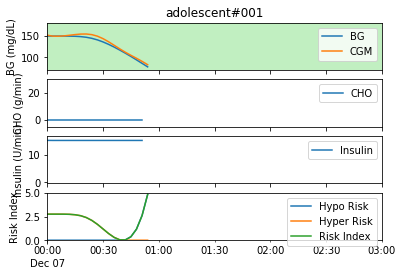

In [34]:
from simglucose.controller.basal_bolus_ctrller import BBController
bb_ctrller = BBController()

reward = 0
done = False
info = {'sample_time': 3,
        'patient_name': 'adolescent#002',
        'meal': 0}

observation = env.reset()
for t in range(T_STEP):
    env.render(mode='human')
    #print(observation)
    # action = env.action_space.sample()
    ctrl_action = bb_ctrller.policy(observation, reward, done, **info)
    action = ctrl_action.basal + ctrl_action.bolus
    observation, reward, done, info = env.step(action)
    if done:
        print("Episode finished after {} timesteps".format(t + 1))
        break

##### RL DDPG controller

Episode finished after 44 timesteps


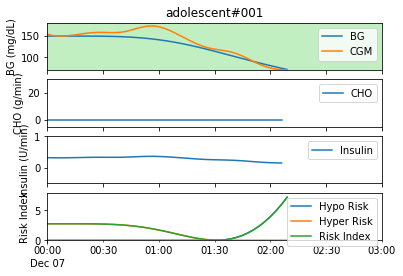

In [33]:
ddpg_ctrller = DDPGController(0)

observation =  test_env.reset()
for t in range(T_STEP):
    test_env.render(mode='human')
    action = ddpg_ctrller.policy(observation, reward, done, **info)
    observation, reward, done, info = test_env.step(action)
    if done:
        print("Episode finished after {} timesteps".format(t + 1))
        break